# IHM Stefanini

Processo seletivo: Cientista de Dados Junior

Candidata: Izabella Giffoni Mazzinghy



Repositório do desafio de dados localizado em:

https://github.com/ihmstefanini/junior-datascience-challenge

# Quality Prediction in a Mining Process

Conjunto de Dados do Repositório de Machine Learning / Kaggle

https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process

In [2]:
#Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import colorsys
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor
import math
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression

plt.style.use ('seaborn-talk')
%matplotlib inline

In [3]:
#Carregando o dataset
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv", decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

In [4]:
#Verificando o formato dos dados
df.shape

(736282, 24)

In [5]:
#Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Col

In [6]:
#Verificando as primeiras linhas do dataset
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
#Verificando as primeiras linhas do dataset
df.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
737452,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


In [8]:
#Verificando se existem valores nulos
df.isnull ().values.any()

False

In [9]:
#Dados estatísticos
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


In [10]:
#Removendo todas as filas duplicadas
df = df.drop_duplicates(subset = ["% Silica Concentrate","% Iron Concentrate"])

In [11]:
#Dados estatísticos da coluna % Silica Concentrate
df["% Silica Concentrate"].describe()

count    60875.000000
mean         3.919489
std          0.927598
min          0.600000
25%          3.471225
50%          3.969636
75%          4.612343
max          5.530000
Name: % Silica Concentrate, dtype: float64

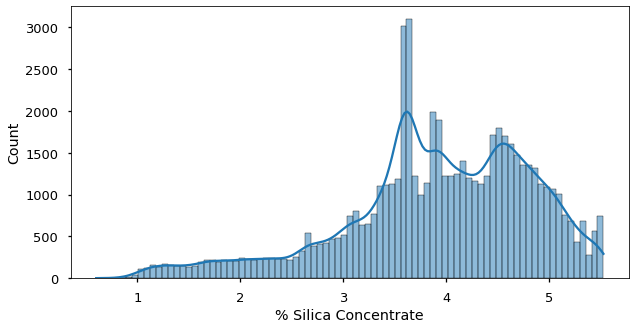

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="% Silica Concentrate", kde=True);

<AxesSubplot:>

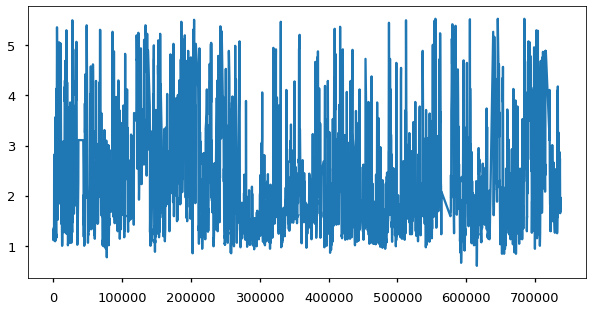

In [13]:
df["% Silica Concentrate"].plot(figsize=(10, 5))

In [14]:
df["% Silica Concentrate"].rolling(12).mean()

0              NaN
174            NaN
354            NaN
534            NaN
714            NaN
            ...   
736553    2.275000
736733    2.238333
736913    2.196667
737093    2.170833
737273    2.171667
Name: % Silica Concentrate, Length: 60875, dtype: float64

<AxesSubplot:>

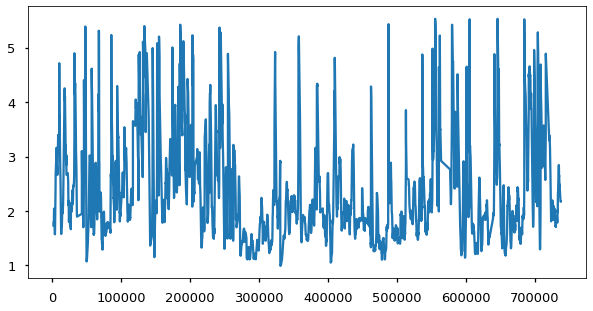

In [15]:
df["% Silica Concentrate"].rolling(12).mean().plot(figsize=(10, 5))

In [16]:
df["% Silica Concentrate"].groupby(df.index).sum()

0         1.31
174       1.11
354       1.27
534       1.36
714       1.34
          ... 
736553    1.65
736733    1.71
736913    1.80
737093    1.96
737273    1.71
Name: % Silica Concentrate, Length: 60875, dtype: float64

<AxesSubplot:>

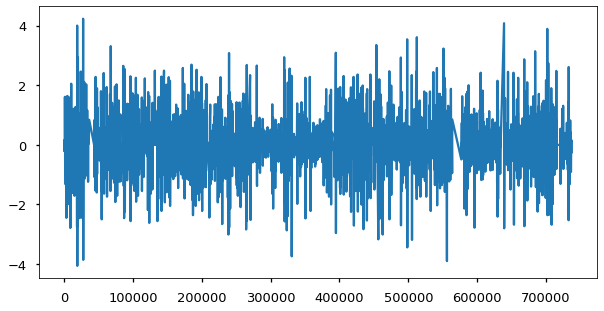

In [18]:
df["% Silica Concentrate"].diff().plot(figsize=(10, 5))

In [55]:
#Dados estatísticos da coluna % Iron Concentrate
df["% Iron Concentrate"].describe()

count    60875.000000
mean        63.292515
std          0.932611
min         62.050000
25%         62.598235
50%         63.056463
75%         63.780000
max         68.010000
Name: % Iron Concentrate, dtype: float64

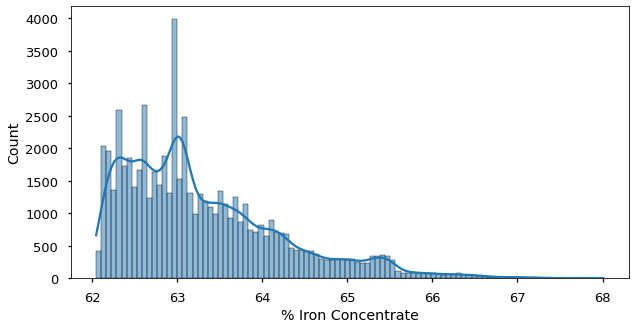

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='% Iron Concentrate', kde=True);

<AxesSubplot:>

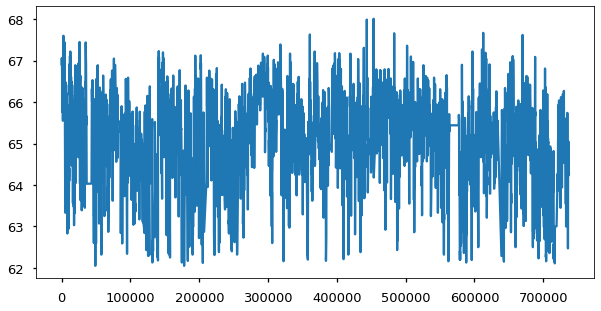

In [57]:
df["% Iron Concentrate"].plot(figsize=(10, 5))

In [58]:
df["% Iron Concentrate"].rolling(12).mean()

0               NaN
174             NaN
354             NaN
534             NaN
714             NaN
            ...    
736553    64.510833
736733    64.546667
736913    64.465833
737093    64.341667
737273    64.264167
Name: % Iron Concentrate, Length: 60875, dtype: float64

<AxesSubplot:>

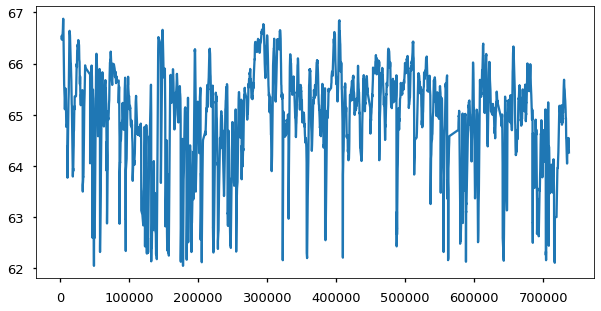

In [59]:
df["% Iron Concentrate"].rolling(12).mean().plot(figsize=(10, 5))

In [60]:
df["% Iron Concentrate"].groupby(df.index).sum()

0         66.91
174       67.06
354       66.97
534       66.75
714       66.63
          ...  
736553    65.05
736733    64.83
736913    64.29
737093    64.25
737273    64.27
Name: % Iron Concentrate, Length: 60875, dtype: float64

<AxesSubplot:>

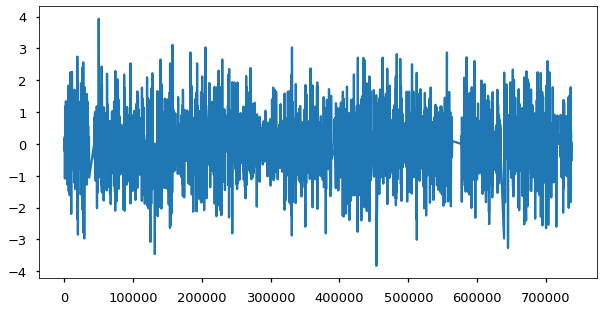

In [17]:
df["% Iron Concentrate"].diff().plot(figsize=(10, 5))

In [62]:
#Identificando a correlação entre as variáveis
def plot_corr (df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

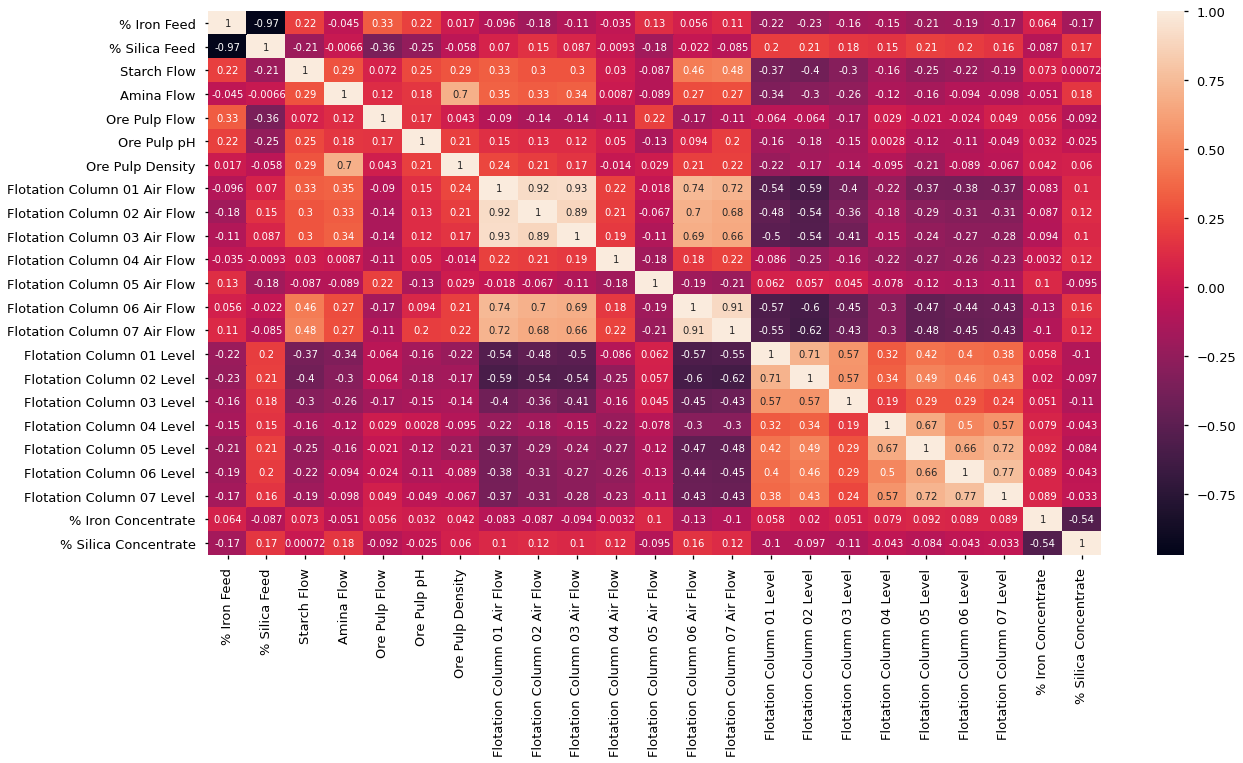

In [63]:
#Criando o gráfico
plt.figure(figsize=(20, 10))
p = sns.heatmap(df.corr(), annot=True)

In [17]:
#Visualizando a correlação em tabela
#Coeficiente de correlação:
# +1 = Forte correlação positiva
# 0 = Não há correlação
# -1 = Forte correlação negativa
df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.970061,0.215014,-0.044505,0.325787,0.217425,0.016581,-0.095645,-0.181107,-0.106415,...,0.114632,-0.215721,-0.226786,-0.163899,-0.148548,-0.207379,-0.193696,-0.165524,0.063541,-0.167827
% Silica Feed,-0.970061,1.000000,-0.208139,-0.006598,-0.359624,-0.245227,-0.058076,0.070380,0.150609,0.087352,...,-0.085004,0.203819,0.214839,0.175438,0.154697,0.212580,0.195972,0.164779,-0.087474,0.170575
Starch Flow,0.215014,-0.208139,1.000000,0.290985,0.072446,0.249656,0.292430,0.332336,0.299263,0.297814,...,0.477658,-0.372057,-0.397146,-0.304505,-0.158136,-0.247110,-0.218170,-0.189401,0.073425,0.000722
Amina Flow,-0.044505,-0.006598,0.290985,1.000000,0.123032,0.176426,0.696771,0.348059,0.327089,0.341305,...,0.271104,-0.338033,-0.298614,-0.257868,-0.123730,-0.155378,-0.093579,-0.098437,-0.051362,0.175332
Ore Pulp Flow,0.325787,-0.359624,0.072446,0.123032,1.000000,0.168507,0.043116,-0.089964,-0.136788,-0.135230,...,-0.109361,-0.064147,-0.064151,-0.172441,0.028714,-0.021035,-0.024056,0.049166,0.055611,-0.092410
Ore Pulp pH,0.217425,-0.245227,0.249656,0.176426,0.168507,1.000000,0.211184,0.145210,0.127156,0.124695,...,0.204841,-0.164024,-0.179550,-0.148214,0.002837,-0.122569,-0.109238,-0.048920,0.031634,-0.024871
Ore Pulp Density,0.016581,-0.058076,0.292430,0.696771,0.043116,0.211184,1.000000,0.243257,0.205505,0.168168,...,0.218297,-0.219662,-0.173558,-0.136285,-0.095119,-0.206722,-0.089303,-0.067355,0.041550,0.060373
Flotation Column 01 Air Flow,-0.095645,0.070380,0.332336,0.348059,-0.089964,0.145210,0.243257,1.000000,0.915765,0.926363,...,0.718272,-0.535589,-0.592862,-0.404346,-0.224137,-0.369870,-0.383815,-0.374360,-0.083094,0.104537
Flotation Column 02 Air Flow,-0.181107,0.150609,0.299263,0.327089,-0.136788,0.127156,0.205505,0.915765,1.000000,0.889802,...,0.676283,-0.482785,-0.543379,-0.355021,-0.182067,-0.292482,-0.310585,-0.311128,-0.087025,0.116040
Flotation Column 03 Air Flow,-0.106415,0.087352,0.297814,0.341305,-0.135230,0.124695,0.168168,0.926363,0.889802,1.000000,...,0.662381,-0.502997,-0.535315,-0.405015,-0.154073,-0.239491,-0.270749,-0.277020,-0.093968,0.101065


In [18]:
#Visualizando a correlação da coluna % Silica Concentrate
silic_corr = df.corr()['% Silica Concentrate']
silic_corr = abs(silic_corr).sort_values()
silic_corr

Starch Flow                     0.000722
Ore Pulp pH                     0.024871
Flotation Column 07 Level       0.032708
Flotation Column 06 Level       0.042506
Flotation Column 04 Level       0.042816
Ore Pulp Density                0.060373
Flotation Column 05 Level       0.084075
Ore Pulp Flow                   0.092410
Flotation Column 05 Air Flow    0.094509
Flotation Column 02 Level       0.096754
Flotation Column 03 Air Flow    0.101065
Flotation Column 01 Air Flow    0.104537
Flotation Column 01 Level       0.104833
Flotation Column 03 Level       0.109411
Flotation Column 02 Air Flow    0.116040
Flotation Column 07 Air Flow    0.118832
Flotation Column 04 Air Flow    0.124079
Flotation Column 06 Air Flow    0.157718
% Iron Feed                     0.167827
% Silica Feed                   0.170575
Amina Flow                      0.175332
% Iron Concentrate              0.539487
% Silica Concentrate            1.000000
Name: % Silica Concentrate, dtype: float64

<AxesSubplot:>

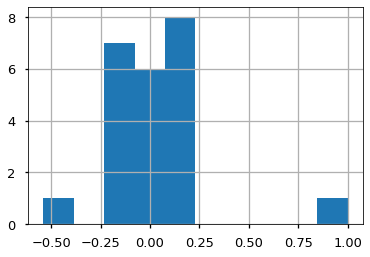

In [19]:
df.corr()['% Silica Concentrate'].hist()

In [20]:
drop_index= silic_corr.index[:14].tolist() + ['date']
print (drop_index)

['Starch Flow', 'Ore Pulp pH', 'Flotation Column 07 Level', 'Flotation Column 06 Level', 'Flotation Column 04 Level', 'Ore Pulp Density', 'Flotation Column 05 Level', 'Ore Pulp Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 02 Level', 'Flotation Column 03 Air Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 03 Level', 'date']


In [21]:
drop_index

['Starch Flow',
 'Ore Pulp pH',
 'Flotation Column 07 Level',
 'Flotation Column 06 Level',
 'Flotation Column 04 Level',
 'Ore Pulp Density',
 'Flotation Column 05 Level',
 'Ore Pulp Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 03 Air Flow',
 'Flotation Column 01 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 03 Level',
 'date']

In [63]:
df

,index,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,% Iron Concentrate,% Silica Concentrate
0,0,55.20,16.98,557.434,253.235,295.096,250.225,250.884,66.91,1.31
1,174,55.20,16.98,539.673,248.269,295.096,250.488,249.774,67.06,1.11
2,354,55.20,16.98,573.517,253.312,295.096,250.829,249.060,66.97,1.27
3,534,55.20,16.98,592.133,251.906,295.096,252.081,249.236,66.75,1.36
4,714,55.20,16.98,601.807,246.313,295.096,252.686,252.686,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...
60870,736553,49.75,23.20,494.990,297.754,300.583,297.551,302.330,65.05,1.65
60871,736733,49.75,23.20,492.027,301.348,300.125,336.250,342.615,64.83,1.71
60872,736913,49.75,23.20,520.986,298.480,299.130,350.652,332.393,64.29,1.80
60873,737093,49.75,23.20,511.961,298.362,297.533,346.723,226.481,64.25,1.96


In [23]:
df.reset_index(inplace=True)
df

,index,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,0,2017-03-10 01:00:00,55.20,16.98,3019.530,557.434,395.713000,10.06640,1.74000,249.214,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,174,2017-03-10 02:00:00,55.20,16.98,3170.410,539.673,399.697000,10.15890,1.66910,249.291,...,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,67.06,1.11
2,354,2017-03-10 03:00:00,55.20,16.98,3365.650,573.517,399.023000,10.08600,1.70565,249.379,...,249.060,456.445,440.432,456.625,432.736,464.334,445.950,432.906,66.97,1.27
3,534,2017-03-10 04:00:00,55.20,16.98,2693.750,592.133,409.204000,9.94880,1.72472,248.302,...,249.236,459.248,480.114,453.814,433.885,438.642,421.974,408.193,66.75,1.36
4,714,2017-03-10 05:00:00,55.20,16.98,2352.216,601.807,398.145000,9.84375,1.75928,248.950,...,252.686,558.545,548.280,551.960,561.720,543.070,529.260,514.240,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60870,736553,2017-09-09 19:00:00,49.75,23.20,2888.060,494.990,376.468000,9.27990,1.66786,317.065,...,302.330,577.943,489.959,504.995,440.587,481.295,434.701,401.796,65.05,1.65
60871,736733,2017-09-09 20:00:00,49.75,23.20,4218.570,492.027,378.630000,9.15799,1.64888,302.081,...,342.615,412.491,510.388,342.202,371.883,594.518,443.687,375.044,64.83,1.71
60872,736913,2017-09-09 21:00:00,49.75,23.20,3159.100,520.986,381.468667,9.58069,1.73620,296.063,...,332.393,401.456,533.409,390.060,395.463,587.855,489.406,504.982,64.29,1.80
60873,737093,2017-09-09 22:00:00,49.75,23.20,3348.190,511.961,379.684000,9.89000,1.73723,301.655,...,226.481,399.186,520.956,700.739,422.519,585.371,474.397,385.606,64.25,1.96


In [24]:
drop_index= silic_corr.index[:14].tolist() + ['date']#+["% Iron Concentrate"]
print (drop_index)

['Starch Flow', 'Ore Pulp pH', 'Flotation Column 07 Level', 'Flotation Column 06 Level', 'Flotation Column 04 Level', 'Ore Pulp Density', 'Flotation Column 05 Level', 'Ore Pulp Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 02 Level', 'Flotation Column 03 Air Flow', 'Flotation Column 01 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 03 Level', 'date']


In [25]:
drop_index

['Starch Flow',
 'Ore Pulp pH',
 'Flotation Column 07 Level',
 'Flotation Column 06 Level',
 'Flotation Column 04 Level',
 'Ore Pulp Density',
 'Flotation Column 05 Level',
 'Ore Pulp Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 03 Air Flow',
 'Flotation Column 01 Air Flow',
 'Flotation Column 01 Level',
 'Flotation Column 03 Level',
 'date']

In [26]:
df = df.drop(drop_index, axis=1)
df.head()

,index,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,% Iron Concentrate,% Silica Concentrate
0,0,55.2,16.98,557.434,253.235,295.096,250.225,250.884,66.91,1.31
1,174,55.2,16.98,539.673,248.269,295.096,250.488,249.774,67.06,1.11
2,354,55.2,16.98,573.517,253.312,295.096,250.829,249.060,66.97,1.27
3,534,55.2,16.98,592.133,251.906,295.096,252.081,249.236,66.75,1.36
4,714,55.2,16.98,601.807,246.313,295.096,252.686,252.686,66.63,1.34


In [27]:
df

,index,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,% Iron Concentrate,% Silica Concentrate
0,0,55.20,16.98,557.434,253.235,295.096,250.225,250.884,66.91,1.31
1,174,55.20,16.98,539.673,248.269,295.096,250.488,249.774,67.06,1.11
2,354,55.20,16.98,573.517,253.312,295.096,250.829,249.060,66.97,1.27
3,534,55.20,16.98,592.133,251.906,295.096,252.081,249.236,66.75,1.36
4,714,55.20,16.98,601.807,246.313,295.096,252.686,252.686,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...
60870,736553,49.75,23.20,494.990,297.754,300.583,297.551,302.330,65.05,1.65
60871,736733,49.75,23.20,492.027,301.348,300.125,336.250,342.615,64.83,1.71
60872,736913,49.75,23.20,520.986,298.480,299.130,350.652,332.393,64.29,1.80
60873,737093,49.75,23.20,511.961,298.362,297.533,346.723,226.481,64.25,1.96


In [28]:
Y1 = df['% Silica Concentrate']
X1 = df.drop(['% Silica Concentrate'], axis=1)

In [29]:
X1

,index,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,% Iron Concentrate
0,0,55.20,16.98,557.434,253.235,295.096,250.225,250.884,66.91
1,174,55.20,16.98,539.673,248.269,295.096,250.488,249.774,67.06
2,354,55.20,16.98,573.517,253.312,295.096,250.829,249.060,66.97
3,534,55.20,16.98,592.133,251.906,295.096,252.081,249.236,66.75
4,714,55.20,16.98,601.807,246.313,295.096,252.686,252.686,66.63
...,...,...,...,...,...,...,...,...,...
60870,736553,49.75,23.20,494.990,297.754,300.583,297.551,302.330,65.05
60871,736733,49.75,23.20,492.027,301.348,300.125,336.250,342.615,64.83
60872,736913,49.75,23.20,520.986,298.480,299.130,350.652,332.393,64.29
60873,737093,49.75,23.20,511.961,298.362,297.533,346.723,226.481,64.25


In [30]:
Y1

0        1.31
1        1.11
2        1.27
3        1.36
4        1.34
         ... 
60870    1.65
60871    1.71
60872    1.80
60873    1.96
60874    1.71
Name: % Silica Concentrate, Length: 60875, dtype: float64

In [31]:
#Seleção de variáveis preditoras (Feature Selection)
atributos = ('Flotation Column 07 Air Flow', 'Flotation Column 03 Level', 'Flotation Column 04 Air Flow', 'Flotation Column 06 Air Flow', '% Iron Feed', 'index', '% Silica Feed', 'Amina Flow', '% Iron Concentrate')

In [32]:
#Variável a ser prevista
atrib_prev = ['% Silica Concentrate']

In [33]:
#definindo a taxa de split
split_test_size = 0.20

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size = 0.2, random_state=1)

In [35]:
X_train

,index,% Iron Feed,% Silica Feed,Amina Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,% Iron Concentrate
60040,719788,56.20,12.28,587.938,300.004,301.332000,303.057,305.36800,63.384647
54949,698941,52.15,21.50,731.403,299.546,298.074906,357.191,337.59300,64.092715
26371,190973,55.91,14.44,387.137,247.852,301.245000,306.066,299.74800,62.990000
54302,693998,55.64,15.32,532.227,301.106,299.733449,336.229,322.72375,62.975494
42990,554915,57.46,10.80,594.098,297.501,301.375000,297.022,300.25100,63.997989
...,...,...,...,...,...,...,...,...,...
50057,645884,44.70,30.14,560.487,299.629,299.641000,293.547,308.04900,63.762415
32511,244749,64.03,6.26,515.298,250.165,300.146000,299.927,299.92700,63.669589
5192,85279,57.91,10.54,559.912,248.673,296.465311,250.399,248.54900,65.533031
12172,129859,55.17,14.35,469.150,253.163,304.050781,249.911,249.31400,64.606401


In [36]:
y_train

60040    3.552152
54949    4.829114
26371    5.200000
54302    4.024817
42990    4.733523
           ...   
50057    5.479840
32511    5.163125
5192     2.617153
12172    3.324384
33003    4.743397
Name: % Silica Concentrate, Length: 48700, dtype: float64

In [37]:
print("{0:0.2f}% nos dados de train".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% nos dados de test".format((len(y_train)/len(df.index))*100))

80.00% nos dados de train
80.00% nos dados de test


In [38]:
features = X_train.iloc[:,:].values

In [39]:
features

array([[7.19788000e+05, 5.62000000e+01, 1.22800000e+01, ...,
        3.03057000e+02, 3.05368000e+02, 6.33846471e+01],
       [6.98941000e+05, 5.21500000e+01, 2.15000000e+01, ...,
        3.57191000e+02, 3.37593000e+02, 6.40927147e+01],
       [1.90973000e+05, 5.59100000e+01, 1.44400000e+01, ...,
        3.06066000e+02, 2.99748000e+02, 6.29900000e+01],
       ...,
       [8.52790000e+04, 5.79100000e+01, 1.05400000e+01, ...,
        2.50399000e+02, 2.48549000e+02, 6.55330314e+01],
       [1.29859000e+05, 5.51700000e+01, 1.43500000e+01, ...,
        2.49911000e+02, 2.49314000e+02, 6.46064013e+01],
       [2.45241000e+05, 6.40300000e+01, 6.26000000e+00, ...,
        2.99707000e+02, 2.99792000e+02, 6.33089895e+01]])

In [40]:
labels = y_train.iloc[:].values

In [41]:
labels

array([3.55215182, 4.82911357, 5.2       , ..., 2.61715342, 3.32438356,
       4.74339727])

In [42]:
X=features
Y=labels

In [43]:
# Modelo de regressão linear múltipla
model=lm.LinearRegression()
results=model.fit(features, labels) 

In [44]:
predictions = model.predict(X)

In [45]:
#Verificando a accuracy do modelo
accuracy=model.score(features, labels)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.35501113023380004


In [46]:
# Modelo Random Forest Regressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(features, labels) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [47]:
#Verificando a accuracy do modelo
accuracy=regressor.score(features, labels)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.9955976318012306


In [74]:
# Previsões com o modelo treinado
import pickle

In [78]:
# Salvando o modelo
filename = 'regressor.sav'

In [76]:
pickle.dump(regressor, open(filename, 'wb'))

In [100]:
y_train

60040    3.552152
54949    4.829114
26371    5.200000
54302    4.024817
42990    4.733523
           ...   
50057    5.479840
32511    5.163125
5192     2.617153
12172    3.324384
33003    4.743397
Name: % Silica Concentrate, Length: 48700, dtype: float64

In [107]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
resultado1 = loaded_model.predict(y_train[337493].reshape(1, -1))
resultado2 = loaded_model.predict(y_train[685038].reshape(1, -1))
print(resultado1)
print(resultado2)